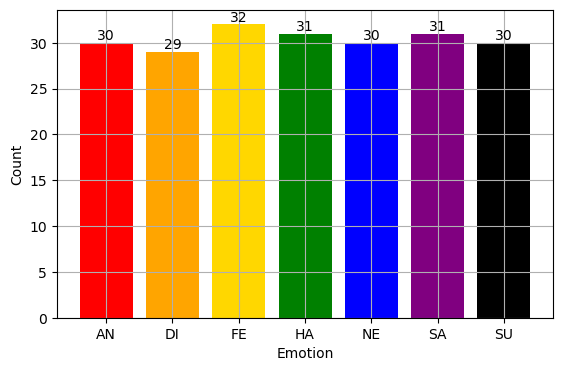

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

def JAFFE_DataLoader():
    path = "./jaffedbase/jaffedbase/"
    
    file_list = os.listdir(path)
    file_list_tiff = [file for file in file_list if file.endswith(".tiff")]

    x, y, pid = [], [], []
    for file_name in file_list_tiff:
        img = cv2.imread(os.path.join(path, file_name), cv2.IMREAD_GRAYSCALE)
        x.append(img)
        y.append(file_name[3:5])
        pid.append(file_name[0:2])  # Person ID

    return x, y, pid
    

def FaceDetection(img_list):
    classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    if classifier.empty():
        print("XML load failed!")
        return

    face_list = []
    for img in img_list:
        faces = classifier.detectMultiScale(img)
        x, y, w, h = faces[0]
        face = img[y:(y + h), x:(x + w)]  # square box
        face = cv2.resize(src=face, dsize=(48, 48), interpolation=cv2.INTER_LINEAR)
        face_list.append(face)
        
    return face_list


def VisualizeCounts(y):
    names, cnt = np.unique(y, return_counts=True)
    
    plt.figure()
    bar = plt.bar(range(0, len(names), 1), cnt, \
                  color=["red", "orange", "gold", "green", "blue", "purple", "black"])

    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, \
                 f'{height:d}', ha="center", va="bottom")
    
    plt.xticks(range(0, len(names), 1), names)
    plt.xlabel("Emotion")
    plt.ylabel("Count")
    plt.grid()
    plt.show()
    

if __name__ == "__main__":
    x, y, pid = JAFFE_DataLoader()
    x = FaceDetection(x)
    
    np.savez_compressed("jaffe.npz", x=x, y=y, pid=pid)

    data = np.load("jaffe.npz")
    x = data['x']
    y = data['y']

    VisualizeCounts(y)